In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pymc3 as pm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import theano
import scipy.stats as stats
import scipy
import seaborn as sns
sns.set(color_codes=True)

from bayesian import LinearModelWithError

In [2]:
# Set logging
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('bayesian_glm')

plt.style.use('fivethirtyeight')
%matplotlib inline

files = ["data_1_1.csv", "data_1_2.csv", "data_1_3.csv", "data_1_4.csv", "data_1_5.csv"]

<H3> Select Dataset </H3>

In [4]:
file_name = "data_1_2.csv"
x, y = LinearModelWithError.xy_op("data_1_1.csv")
data = dict(x=x, y=y)

INFO:LinearModelWithError:reading file data_1_1.csv
INFO:LinearModelWithError:shape of [X] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:LinearModelWithError:shape of [Y] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


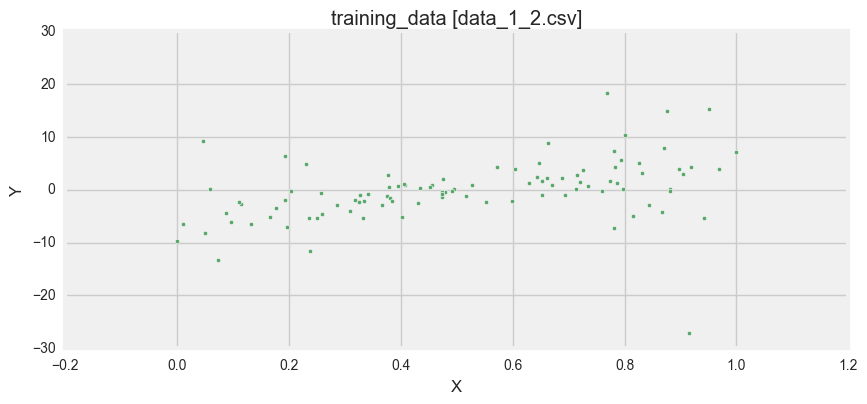

In [6]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(211)
ax.scatter(x[:], y[:], s=10, c='g')
ax.set_ylabel("Y")
ax.set_xlabel('X')
ax.set_title("training_data [{}]".format(file_name))
ax.legend() 

ax = fig.add_subplot(211)

fig.show()

In [11]:
def model(x, y):
    """
    Student T distribution

    This one with uniform priors

    Parameters
        ----------
        nu : int
            Degrees of freedom (nu > 0).
        mu : float
            Location parameter.
        lam : float
            Scale parameter (lam > 0).

        The (ei) are independent noise from a distribution that depends on x 
        as well as on global parameters; however, the noise distribution has 
        conditional mean zero given x                    

        Hypothesis

        ei is drawn from a Student T distribution. the sclae parameter for ei is x.
        The global parameter for ei is nu or degrees of freedom

        How can you change the scale of a standard student-t distribution
    """
    with pm.Model() as vvf_model:

        # Define priors
        b0 = pm.Normal("b0", mu=0, sd=20)
        b1 = pm.Normal("b1", mu=0, sd=20)
        lam = pm.Uniform("lam", lower=0.0, upper=20.0)
        nu = pm.Uniform("nu", lower=0.0, upper=20.0)

        # Identity Link Function 
        mu = b0 + b1*x
        
        error = mu + pm.StudentT("y_obs", mu=0, lam=lam, nu=nu)
        y_obs = pm.StudentT("y_obs", mu=0, lam=lam, nu=nu, observed=y)

    return vvf_model

In [5]:
lm = LinearModelWithError(file_name, model(x, y))
lm.result_and_diagnostics()

INFO:LinearModelWithError:reading file data_1_2.csv
INFO:LinearModelWithError:shape of [X] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:LinearModelWithError:shape of [Y] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
Applied interval-transform to nu and added transformed nu_interval_ to m

TypeError: Deterministic() got an unexpected keyword argument 'observed'

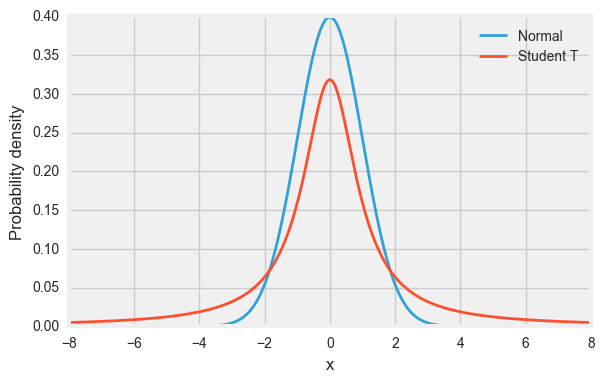

In [7]:
normal_dist = pm.Normal.dist(mu=0, sd=1)
t_dist = pm.StudentT.dist(mu=0, lam=1, nu=1)
x_eval = np.linspace(-8, 8, 300)
plt.plot(x_eval, theano.tensor.exp(normal_dist.logp(x_eval)).eval(), label='Normal', lw=2.)
plt.plot(x_eval, theano.tensor.exp(t_dist.logp(x_eval)).eval(), label='Student T', lw=2.)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend();

INFO:LinearModelWithError:reading file data_1_2.csv
INFO:LinearModelWithError:shape of [X] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:LinearModelWithError:shape of [Y] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
Applied interval-transform to lam and added transformed lam_interval_ to

Results and Diagnostics for data_1_2.csv


INFO:LinearModelWithError:Starting values = {'lam_interval_': array(-6.084481760423269), 'nu_interval_': array(-2.6753794174692045), 'b0': array(-26.071256941900312), 'b1': array(44.18896758547882)}
Assigned NUTS to b0
INFO:pymc3:Assigned NUTS to b0
Assigned NUTS to b1
INFO:pymc3:Assigned NUTS to b1
Assigned NUTS to lam_interval_
INFO:pymc3:Assigned NUTS to lam_interval_
Assigned NUTS to nu_interval_
INFO:pymc3:Assigned NUTS to nu_interval_
100%|██████████| 10000/10000 [00:14<00:00, 682.15it/s]



b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -26.318          3.234            0.072            [-32.392, -19.804]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -32.877        -28.521        -26.236        -24.082        -20.208


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  44.721           5.348            0.120            [35.032, 55.726]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  34.988         40.988         44.486         48.314         55.711


lam:

  Mean             SD               MC Error         95% HPD interval
  ------------------------

NameError: global name 'sns' is not defined

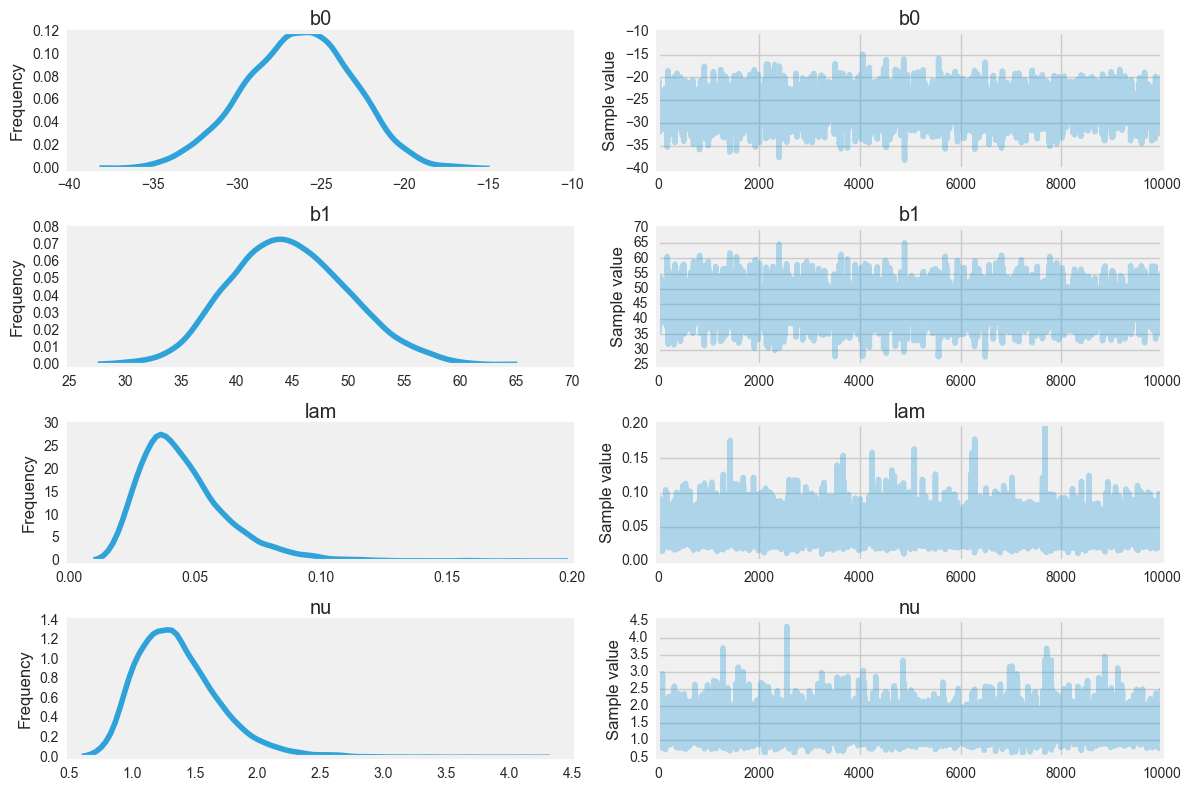

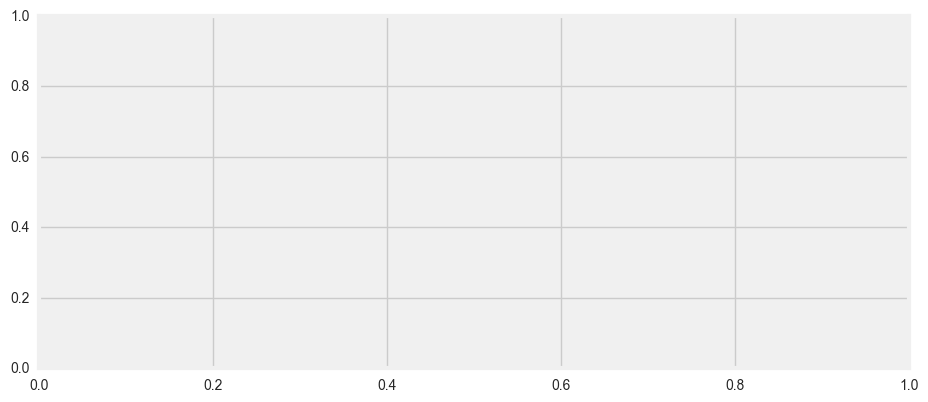

In [7]:
lm = LinearModelWithError("data_1_2.csv")
lm.result_and_diagnostics()

INFO:bayesian_glm:reading file data_1_1.csv
INFO:bayesian_glm:shape of [X] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:bayesian_glm:shape of [Y] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
Applied interval-transform to lam and added transformed lam_interval_ to model.
INFO:pymc3:Appli

Results and Diagnostics for data_1_1.csv


INFO:bayesian_glm:Starting values = {'lam_interval_': array(-4.557408228740321), 'nu_interval_': array(-2.298544621843592), 'b0': array(-5.591286259567409), 'b1': array(10.651751211310803)}
Assigned NUTS to b0
INFO:pymc3:Assigned NUTS to b0
Assigned NUTS to b1
INFO:pymc3:Assigned NUTS to b1
Assigned NUTS to lam_interval_
INFO:pymc3:Assigned NUTS to lam_interval_
Assigned NUTS to nu_interval_
INFO:pymc3:Assigned NUTS to nu_interval_
100%|██████████| 10000/10000 [00:14<00:00, 688.45it/s]



b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -5.531           0.716            0.017            [-6.903, -4.150]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -6.879         -6.018         -5.547         -5.049         -4.110


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  10.547           1.289            0.030            [7.948, 12.935]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  8.010          9.693          10.576         11.435         13.025


lam:

  Mean             SD               MC Error         95% HPD interval
  ----------------------------

INFO:bayesian_glm:reading file data_1_2.csv
INFO:bayesian_glm:shape of [X] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:bayesian_glm:shape of [Y] is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
Applied interval-transform to lam and added transformed lam_interval_ to model.
INFO:pymc3:Appli

Results and Diagnostics for data_1_2.csv


INFO:bayesian_glm:Starting values = {'lam_interval_': array(-6.084481760423269), 'nu_interval_': array(-2.6753794174692045), 'b0': array(-26.071256941900312), 'b1': array(44.18896758547882)}
Assigned NUTS to b0
INFO:pymc3:Assigned NUTS to b0
Assigned NUTS to b1
INFO:pymc3:Assigned NUTS to b1
Assigned NUTS to lam_interval_
INFO:pymc3:Assigned NUTS to lam_interval_
Assigned NUTS to nu_interval_
INFO:pymc3:Assigned NUTS to nu_interval_
100%|██████████| 10000/10000 [00:14<00:00, 674.60it/s]



b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -26.297          3.172            0.088            [-32.378, -19.969]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -32.542        -28.447        -26.274        -24.154        -20.068


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  44.678           5.241            0.146            [34.173, 54.578]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  34.610         41.107         44.532         48.216         55.086


lam:

  Mean             SD               MC Error         95% HPD interval
  ------------------------

INFO:bayesian_glm:reading file data_1_3.csv
INFO:bayesian_glm:shape of [X] is (50,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:bayesian_glm:shape of [Y] is (50,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
Applied interval-transform to lam and added transformed lam_interval_ to model.
INFO:pymc3:Applied

Results and Diagnostics for data_1_3.csv


INFO:bayesian_glm:Starting values = {'lam_interval_': array(-5.965858615023174), 'nu_interval_': array(-2.817894191929232), 'b0': array(11.259904262876221), 'b1': array(-18.727073277482003)}
Assigned NUTS to b0
INFO:pymc3:Assigned NUTS to b0
Assigned NUTS to b1
INFO:pymc3:Assigned NUTS to b1
Assigned NUTS to lam_interval_
INFO:pymc3:Assigned NUTS to lam_interval_
Assigned NUTS to nu_interval_
INFO:pymc3:Assigned NUTS to nu_interval_
100%|██████████| 10000/10000 [00:16<00:00, 608.22it/s]



b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  12.124           3.522            0.098            [4.686, 18.959]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  5.328          9.865          11.927         14.149         19.856


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -20.177          6.051            0.168            [-32.821, -8.473]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -33.340        -23.605        -19.880        -16.191        -8.860


lam:

  Mean             SD               MC Error         95% HPD interval
  ---------------------------

INFO:bayesian_glm:reading file data_1_4.csv
INFO:bayesian_glm:shape of [X] is (50,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:bayesian_glm:shape of [Y] is (50,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
Applied interval-transform to lam and added transformed lam_interval_ to model.
INFO:pymc3:Applied

Results and Diagnostics for data_1_4.csv


INFO:bayesian_glm:Starting values = {'lam_interval_': array(-5.042962712356659), 'nu_interval_': array(-1.9897358747631217), 'b0': array(0.07267214802078702), 'b1': array(6.420426057548617)}
Assigned NUTS to b0
INFO:pymc3:Assigned NUTS to b0
Assigned NUTS to b1
INFO:pymc3:Assigned NUTS to b1
Assigned NUTS to lam_interval_
INFO:pymc3:Assigned NUTS to lam_interval_
Assigned NUTS to nu_interval_
INFO:pymc3:Assigned NUTS to nu_interval_
100%|██████████| 10000/10000 [00:15<00:00, 641.50it/s]



b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.290            0.966            0.019            [-1.567, 2.234]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.530         -0.354         0.254          0.907          2.293


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.764            2.246            0.048            [1.356, 10.216]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.102          4.320          5.850          7.308          9.995


lam:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------

INFO:bayesian_glm:reading file data_1_5.csv
INFO:bayesian_glm:shape of [X] is (50,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
INFO:bayesian_glm:shape of [Y] is (50,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
Applied interval-transform to lam and added transformed lam_interval_ to model.
INFO:pymc3:Applied

Results and Diagnostics for data_1_5.csv


INFO:bayesian_glm:Starting values = {'lam_interval_': array(-5.09291193671709), 'nu_interval_': array(-2.7877454265686126), 'b0': array(16.140125176209295), 'b1': array(-21.561081403693667)}
Assigned NUTS to b0
INFO:pymc3:Assigned NUTS to b0
Assigned NUTS to b1
INFO:pymc3:Assigned NUTS to b1
Assigned NUTS to lam_interval_
INFO:pymc3:Assigned NUTS to lam_interval_
Assigned NUTS to nu_interval_
INFO:pymc3:Assigned NUTS to nu_interval_
100%|██████████| 10000/10000 [00:12<00:00, 805.27it/s]



b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  16.057           2.075            0.056            [11.915, 20.136]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  11.842         14.772         16.065         17.417         20.097


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -21.365          3.402            0.091            [-27.782, -14.361]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -27.881        -23.608        -21.363        -19.237        -14.435


lam:

  Mean             SD               MC Error         95% HPD interval
  ------------------------

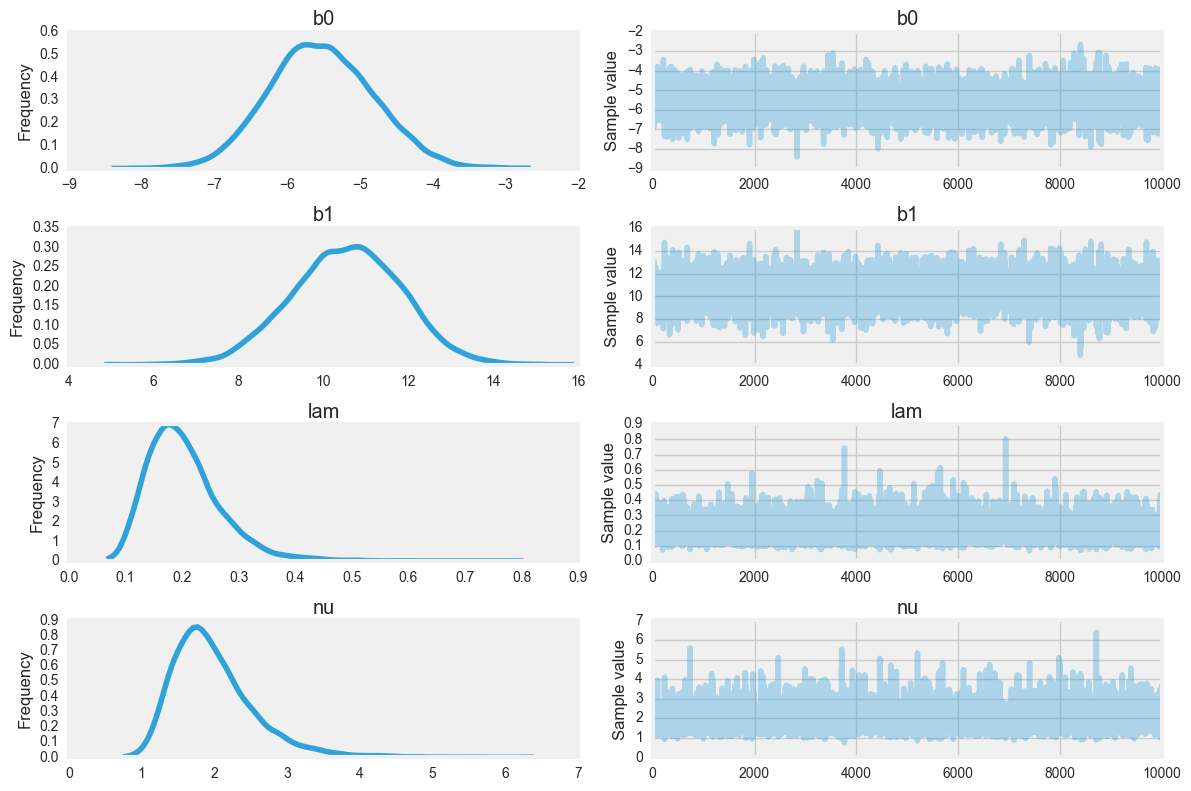

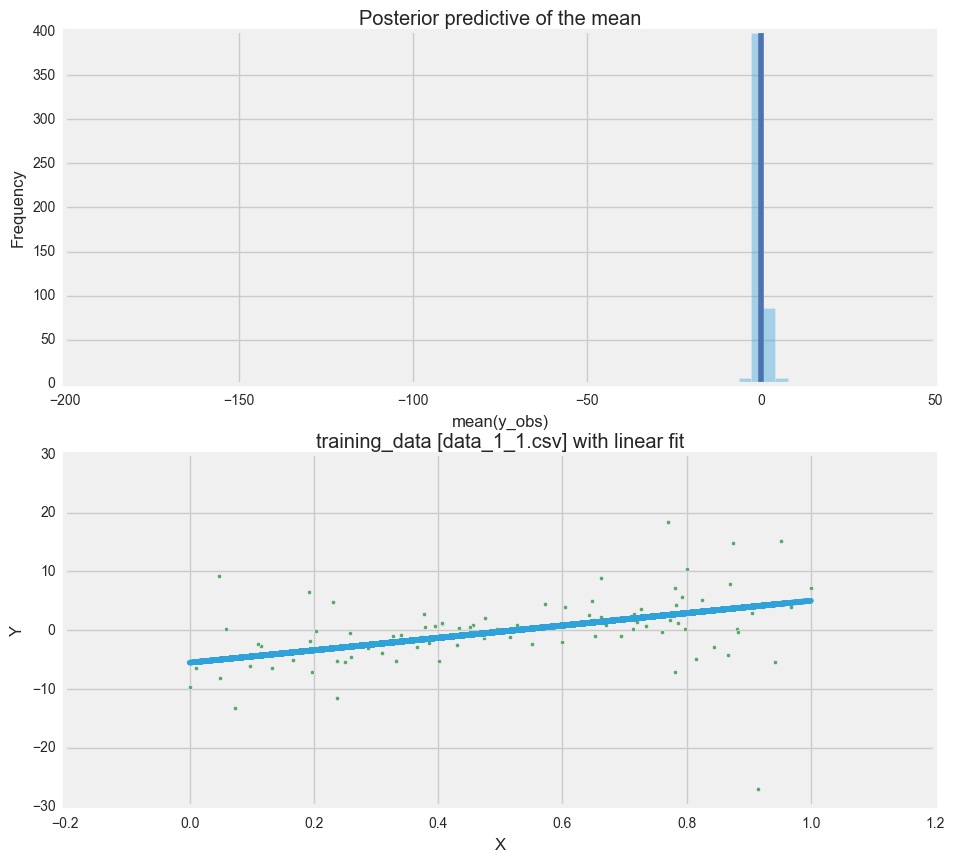

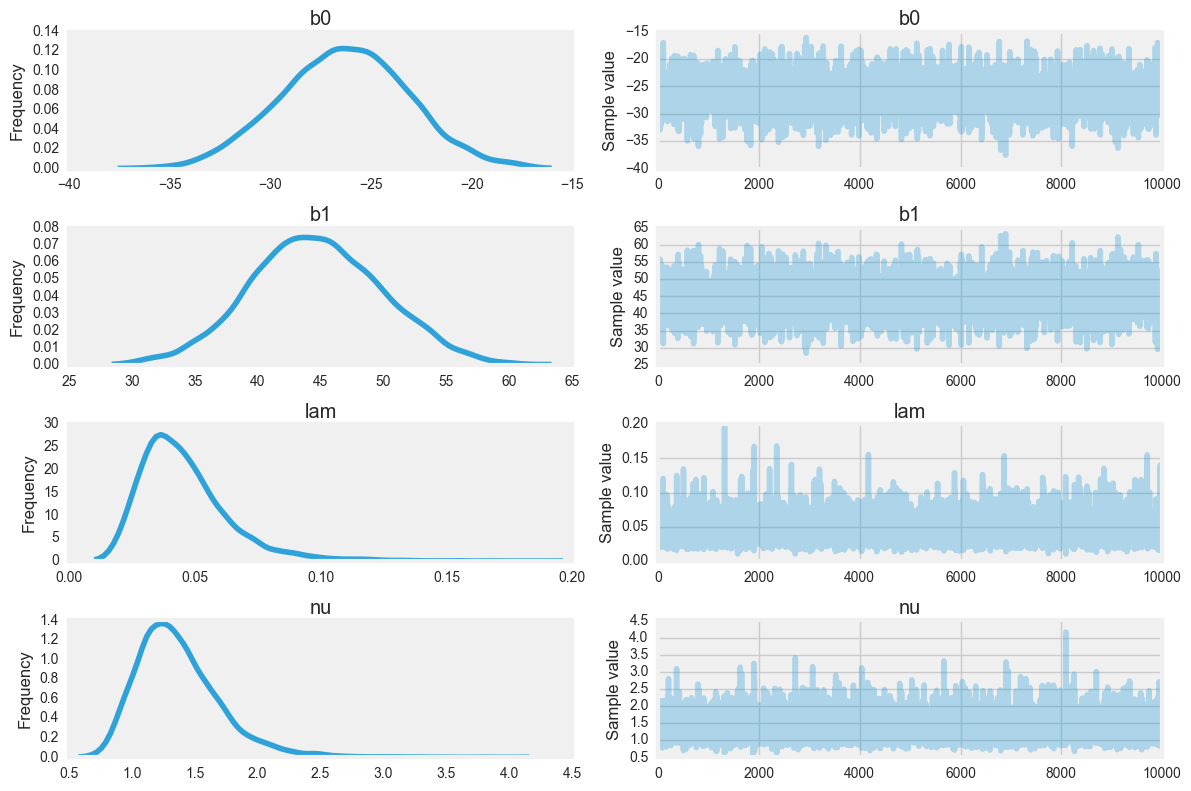

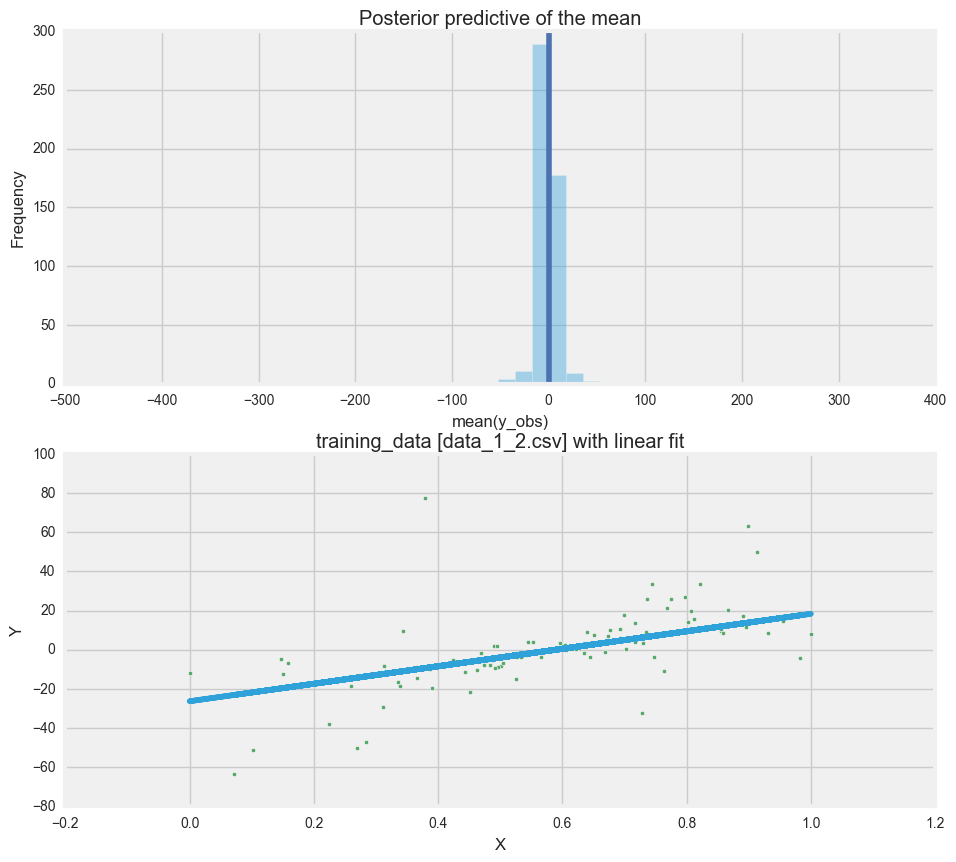

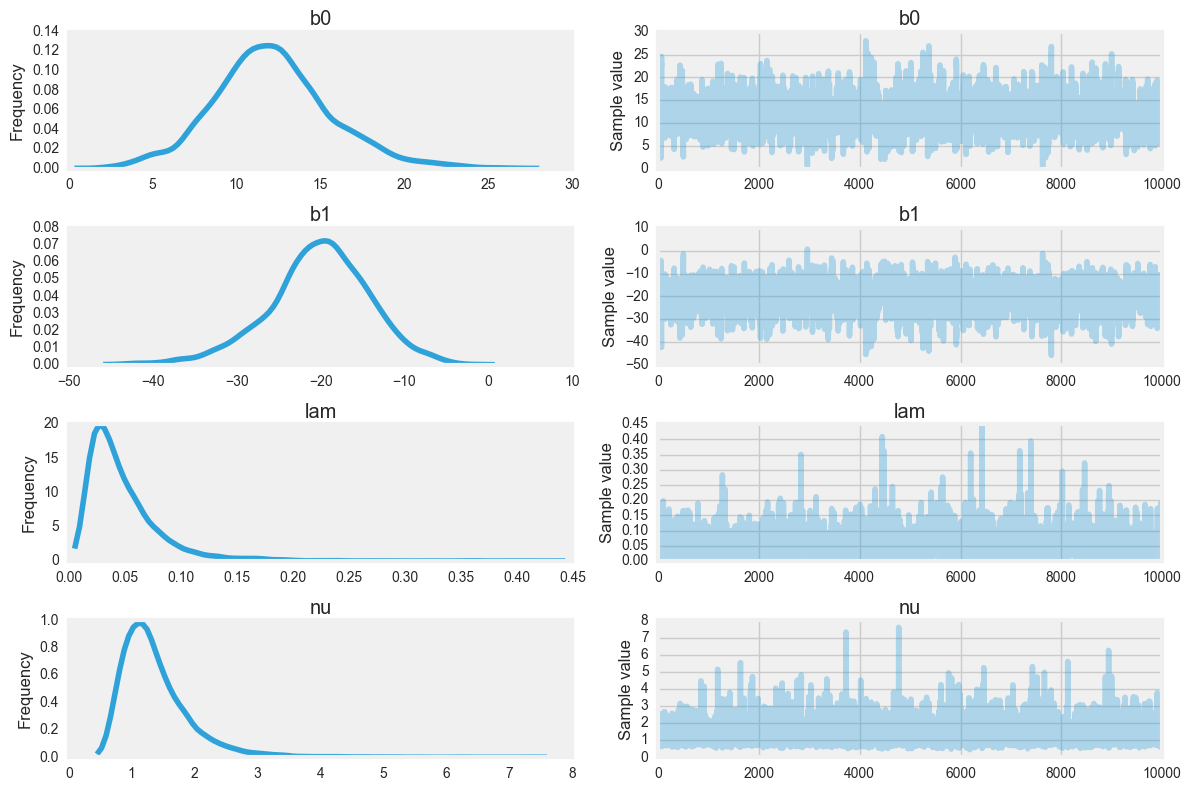

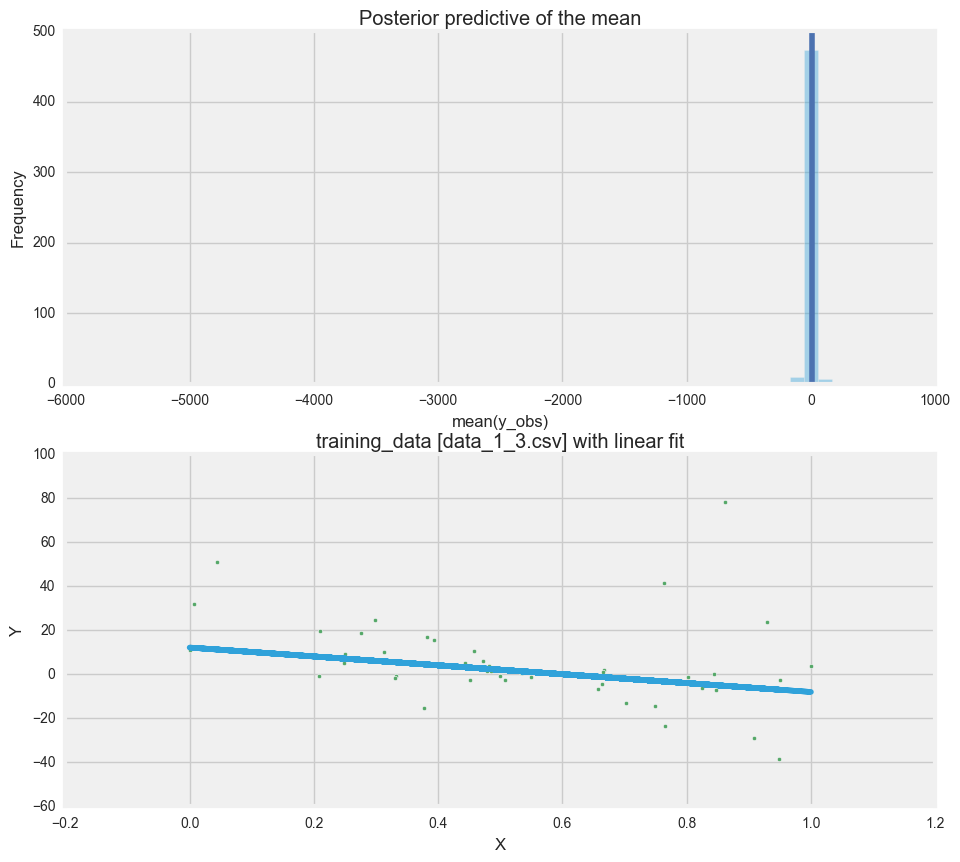

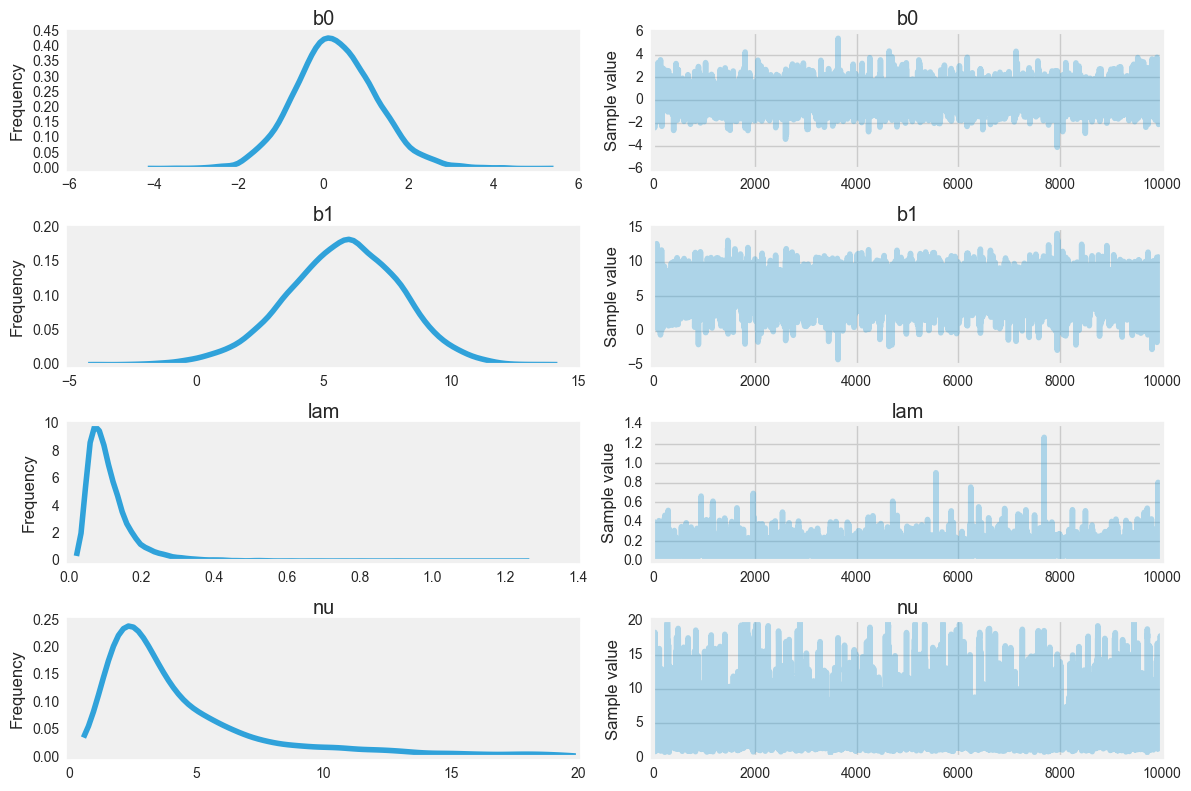

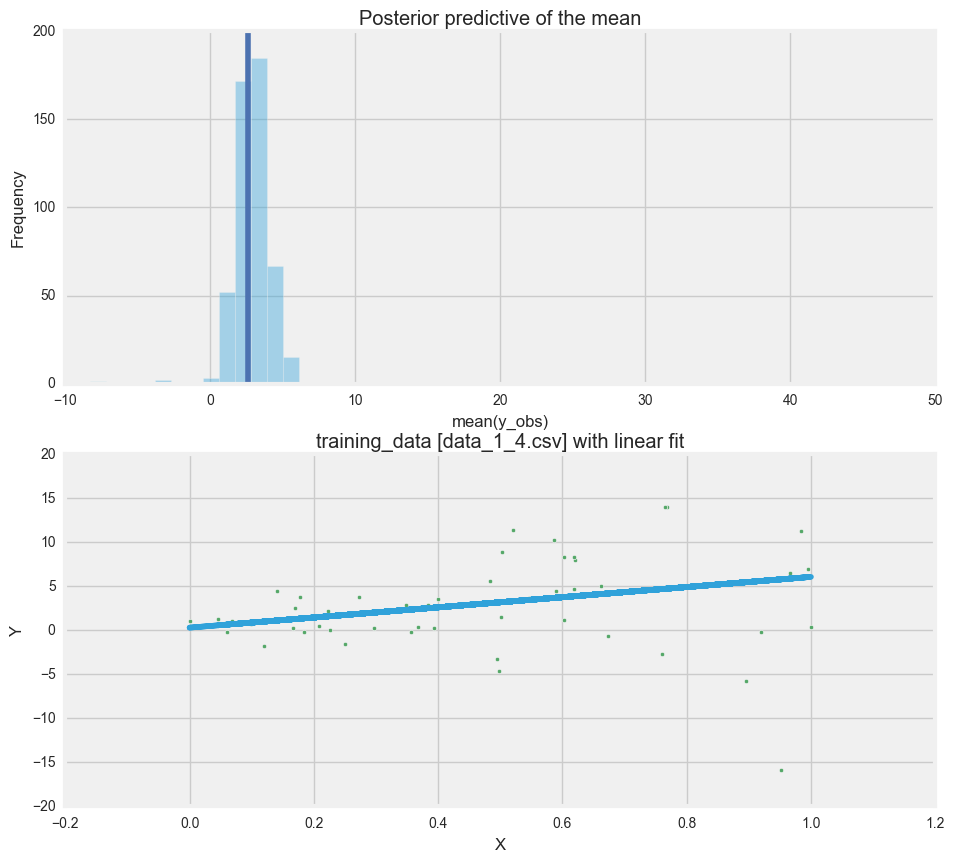

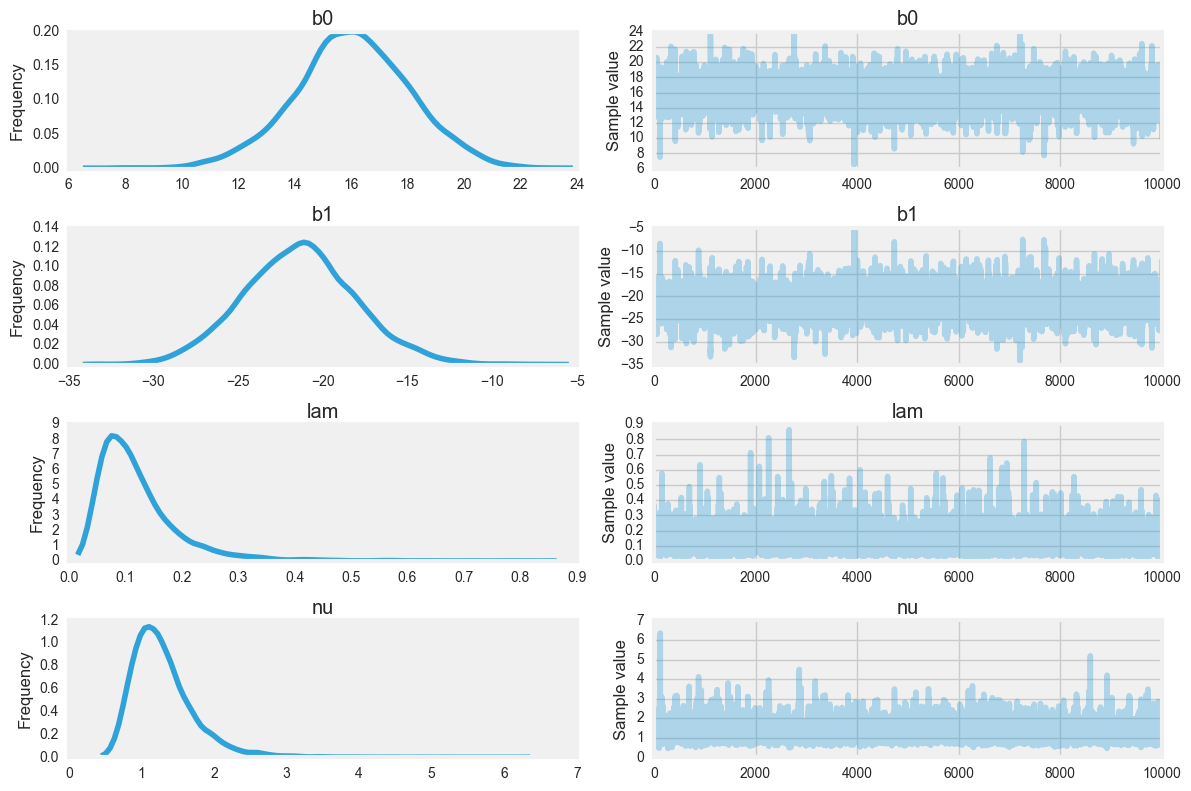

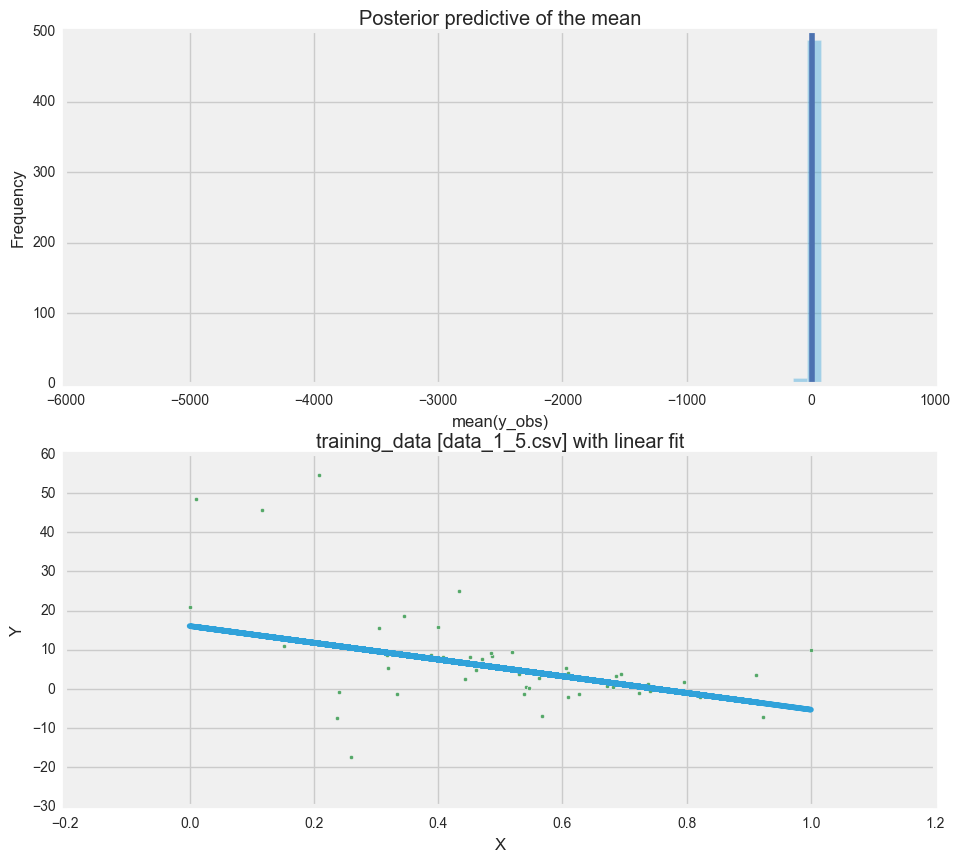

In [8]:
files = ["data_1_1.csv", "data_1_2.csv", "data_1_3.csv", "data_1_4.csv", "data_1_5.csv"]

for file_name in files:
    lm = LinearModelWithError(file_name)
    lm.result_and_diagnostics()

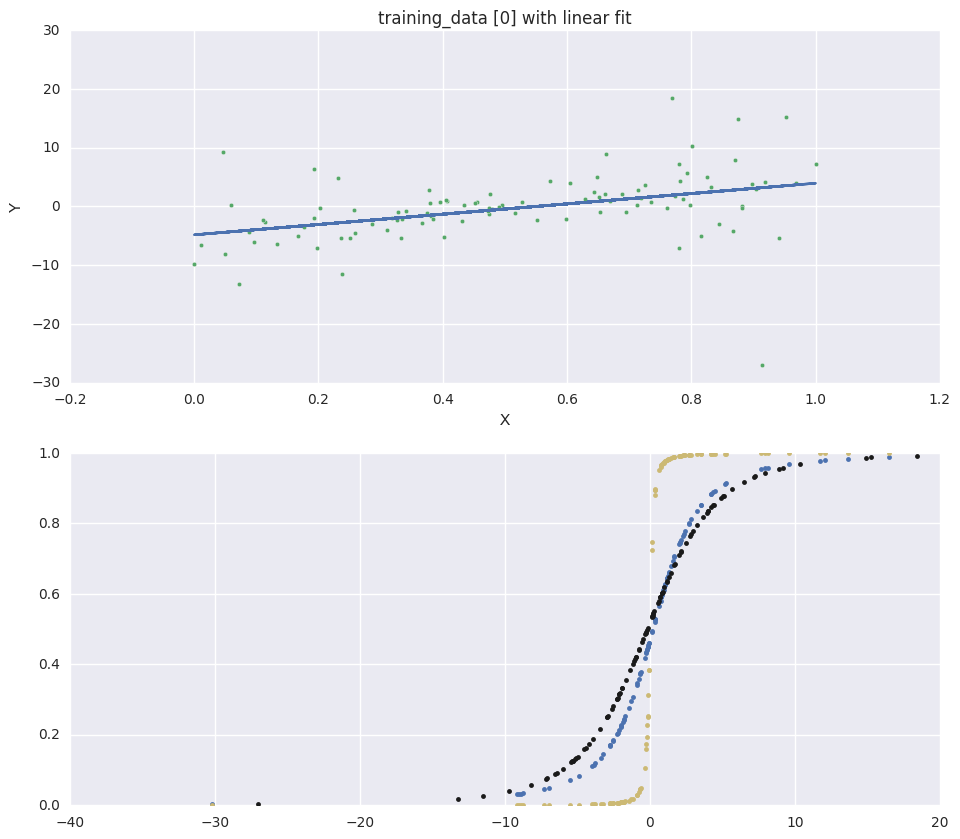

In [176]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.scatter(x[:], y[:], s=10, c='g')
ax1.plot(x[:], (est['b0'] + est['b1']*x)[:])
ax1.set_ylabel("Y")
ax1.set_xlabel('X')
ax1.set_title("training_data [{}] with linear fit".format(file_index))
ax1.legend() 


ax2 = fig.add_subplot(212)

# error of the observed data given b1 and b0
error = y - (est['b0'] + est['b1']*x)

# a t dist. fit of the observed error
(df, loc, scale) = stats.t.fit(error)
rv = stats.t(df, loc=loc, scale=scale)
rv_pdf = np.array([e for e in rv.cdf(error)])
ax2.plot(error, rv_pdf, '.', lw=2, label='frozen pdf', c='b')

# a t dist. of the y value from the observed set
(df, loc, scale) = stats.t.fit(y)
rv = stats.t(df, loc=loc, scale=scale)
rv_pdf = np.array([e for e in rv.cdf(y)])
ax2.plot(y, rv_pdf, '.', lw=2, label='frozen pdf', c='k')


# t dist of the error value from MCMC
rv = stats.t(est['nu'], loc=0, scale=est['lam'])
rv_pdf = np.array([e for e in rv.cdf(error)])
ax2.plot(error, rv_pdf, '.', lw=2, label='frozen pdf', c='y')

fig.show()

In [70]:
type(pm.summary(trace))


b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -5.572           0.701            0.016            [-6.914, -4.249]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -6.903         -6.052         -5.580         -5.090         -4.229


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  10.634           1.269            0.030            [8.222, 13.107]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  8.190          9.774          10.611         11.501         13.083


lam:

  Mean             SD               MC Error         95% HPD interval
  ----------------------------

NoneType

In [148]:
summary(trace)


b0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -5.548           0.672            0.028            [-6.878, -4.271]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -6.841         -6.003         -5.559         -5.125         -4.195


b1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  10.594           1.229            0.051            [8.172, 12.985]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  8.147          9.819          10.621         11.414         12.977


lam:

  Mean             SD               MC Error         95% HPD interval
  ----------------------------